# 18기 Clustering 정규세션 과제

## Clustering 해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [88]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


##1. Preprocssing / EDA

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [90]:
df.shape

(200, 4)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [92]:
#pd.get_dummies(df['Gender'])
df1=pd.get_dummies(data=df,columns=['Gender'],prefix='Gender')

In [93]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
 3   Gender_Female           200 non-null    uint8
 4   Gender_Male             200 non-null    uint8
dtypes: int64(3), uint8(2)
memory usage: 6.6 KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

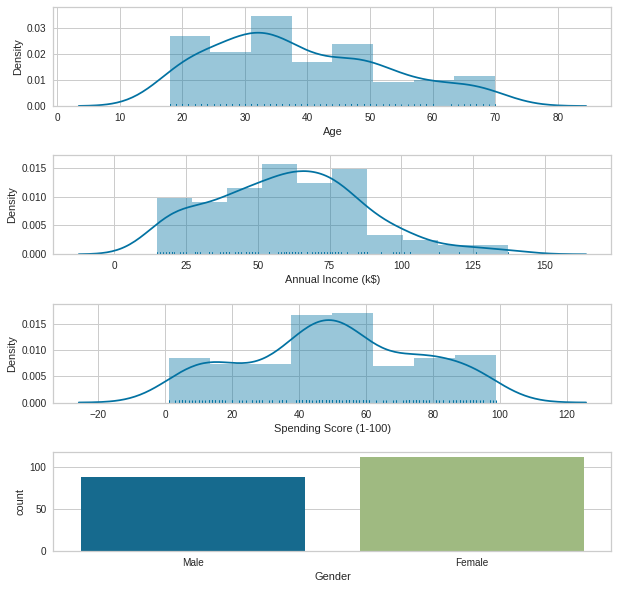

In [94]:
#feature의 분포
fig, ax = plt.subplots(nrows = 4, figsize=(10, 10))
plt.subplots_adjust(hspace = 0.5)
sns.distplot(df1['Age'], kde = True, rug = True, ax = ax[0])
sns.distplot(df1['Annual Income (k$)'], kde = True, rug = True, ax = ax[1])
sns.distplot(df1['Spending Score (1-100)'], kde = True, rug = True, ax = ax[2])
sns.countplot(df['Gender'], ax = ax[3])
plt.show()


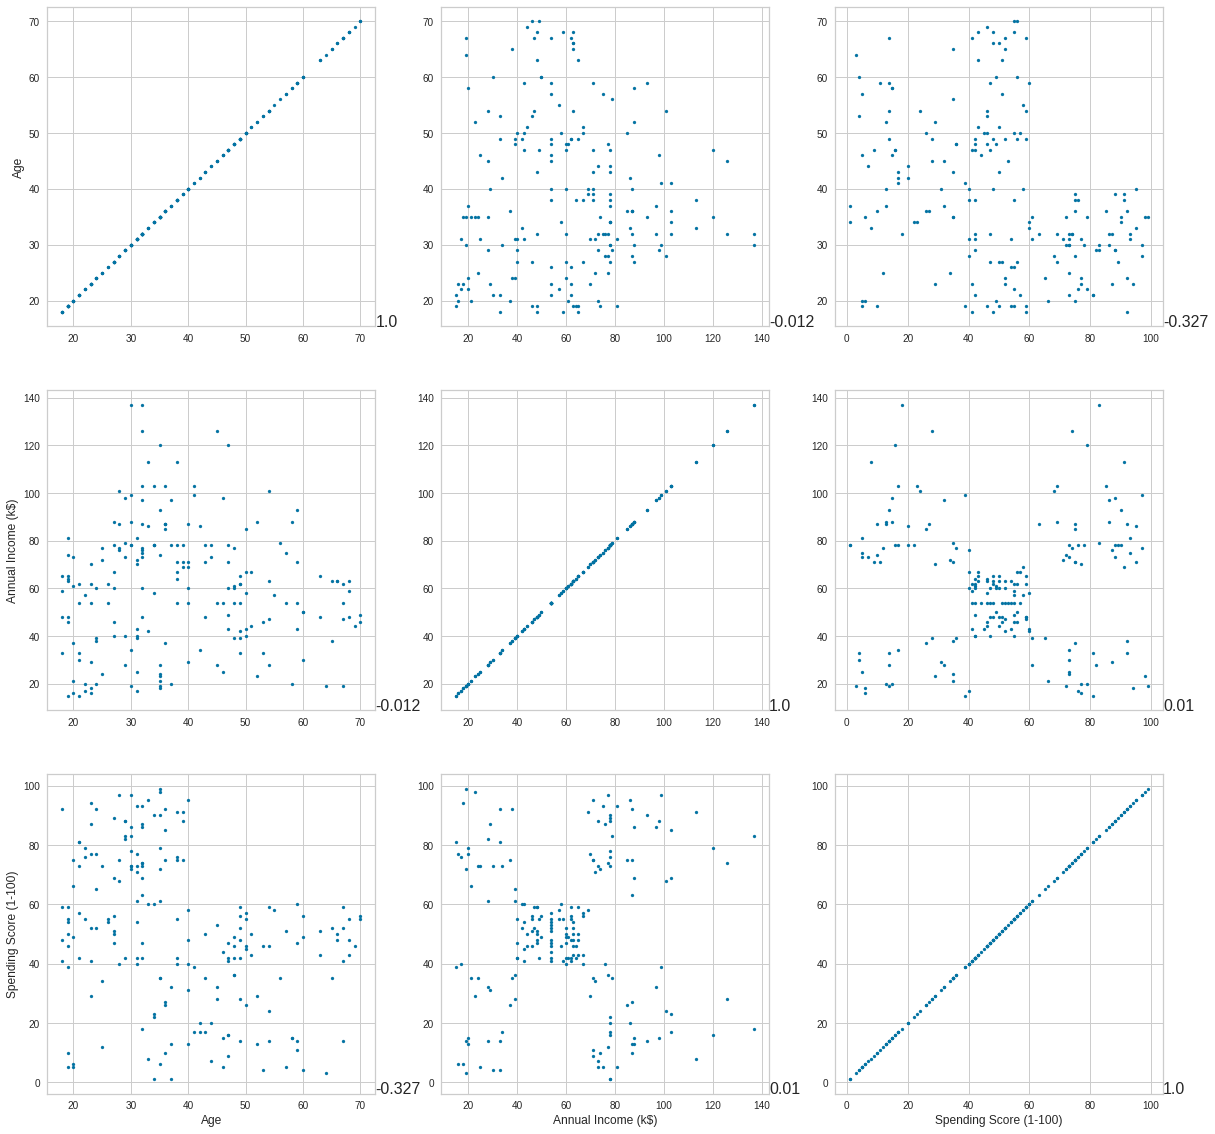

In [95]:
#feature간 관계
# colormap = plt.cm.PuBu
# plt.figure(figsize=(10, 8))
# plt.title("Person Correlation of Features", y = 1.05, size = 15)
# sns.heatmap(df1.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
#            square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

feature=['Age','Annual Income (k$)','Spending Score (1-100)']
fig=plt.figure(figsize=(20,20))
corr_feature=df1[feature].corr()
n_feature=len(feature)
for i in range(n_feature):
  for j in range(n_feature):
    ax= fig.add_subplot(n_feature,n_feature,i*n_feature+j+1)
    plt.scatter(feature[j],feature[i],data=df1,s=9)

    if i == n_feature-1:
      plt.xlabel(feature[j],fontsize=12)

    if j ==0:
      plt.ylabel(feature[i],fontsize=12)
    ax.annotate(np.round(corr_feature.loc[feature[i],feature[j]],3),xy=(1,0),xycoords='axes fraction',fontsize=16)





##2. Clustering

###K-MEANS Clustering

In [96]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer


In [97]:
df2 =df1[['Annual Income (k$)', 'Spending Score (1-100)']]

In [98]:
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(df2)

AttributeError: ignored

TypeError: ignored

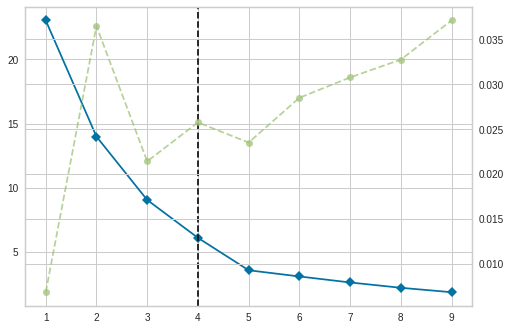

In [99]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data_scale)

In [100]:
k = 4
model = KMeans(n_clusters = k, random_state = 10)
model.fit(data_scale)
df2['cluster'] = model.fit_predict(data_scale)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [101]:
df2

,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,
1,15,39,2
2,15,81,3
3,16,6,2
4,16,77,3
5,17,40,2
...,...,...,...
196,120,79,1
197,126,28,0
198,126,74,1


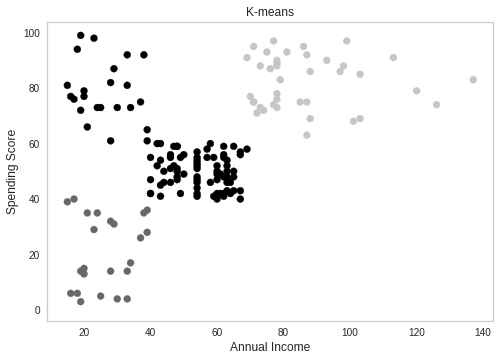

In [102]:
plt.title("K-means", fontsize=12)
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], c = df2['cluster'])
plt.xlabel("Annual Income", fontsize = 12)
plt.ylabel("Spending Score", fontsize = 12)
plt.grid()
plt.show()

###Hierarchical Clustering

In [106]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import scipy.spatial as sp 

In [107]:
df2=df2.drop(['cluster'],axis='columns')
df2

KeyError: ignored

In [108]:
 HC= linkage(df2, method = 'ward')

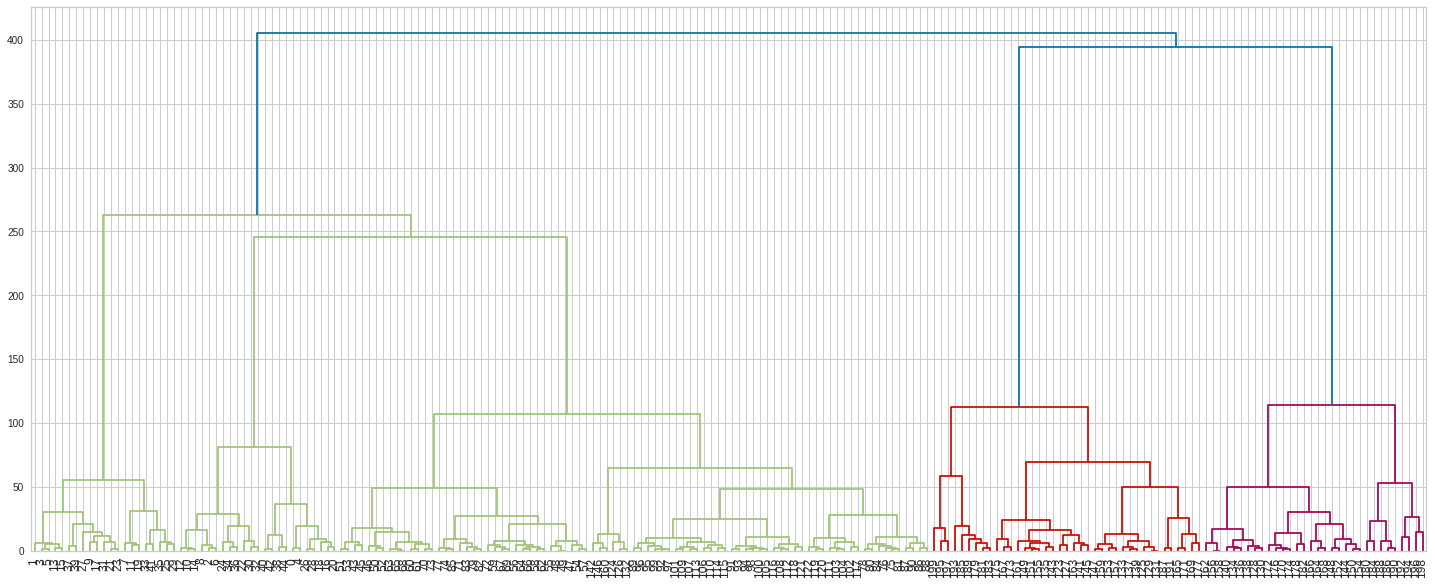

In [109]:
plt.figure(figsize = (25, 10))
dendrogram(HC, leaf_font_size = 12, leaf_rotation = 90)
plt.show()